# UFC fighter statistics
Link: https://www.kaggle.com/datasets/asaniczka/ufc-fighters-statistics

### Imports

In [81]:
%pip install Cython
%pip install pymrmr

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SequentialFeatureSelector
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
# import pymrmr

### Load datset + config

In [2]:
pd.set_option('display.max_columns', 200)
ufc_data = pd.read_csv("ufc-fighters-statistics.csv")

## Exploratory data analysis
### First look at the dataset

In [84]:
print(f"There are {ufc_data.shape[0]} observations in this dataset")
ufc_data.head()

There are 4111 observations in this dataset


,name,nickname,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
0,Robert Drysdale,NaN,7,0,0,190.50,92.99,NaN,Orthodox,1981-10-05,0.00,0.0,0.00,0.0,7.32,100.0,0.0,21.9
1,Daniel McWilliams,The Animal,15,37,0,185.42,83.91,NaN,NaN,NaN,3.36,77.0,0.00,0.0,0.00,0.0,100.0,21.6
2,Dan Molina,NaN,13,9,0,177.80,97.98,NaN,NaN,NaN,0.00,0.0,5.58,60.0,0.00,0.0,0.0,20.9
3,Paul Ruiz,NaN,7,4,0,167.64,61.23,NaN,NaN,NaN,1.40,33.0,1.40,75.0,0.00,0.0,100.0,20.9
4,Collin Huckbody,All In,8,2,0,190.50,83.91,193.04,Orthodox,1994-09-29,2.05,60.0,2.73,42.0,10.23,100.0,0.0,20.4


In [85]:
ufc_data.dtypes

name                                             object
nickname                                         object
wins                                              int64
losses                                            int64
draws                                             int64
height_cm                                       float64
weight_in_kg                                    float64
reach_in_cm                                     float64
stance                                           object
date_of_birth                                    object
significant_strikes_landed_per_minute           float64
significant_striking_accuracy                   float64
significant_strikes_absorbed_per_minute         float64
significant_strike_defence                      float64
average_takedowns_landed_per_15_minutes         float64
takedown_accuracy                               float64
takedown_defense                                float64
average_submissions_attempted_per_15_minutes    

In [86]:
ufc_data.describe()

,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
count,4111.000000,4111.000000,4111.000000,3813.000000,4024.000000,2184.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000
mean,12.366821,5.726344,0.264413,178.234325,77.395825,181.808874,2.437516,35.542447,3.145206,42.643639,1.250586,26.299927,38.958891,0.610095
std,9.374667,5.103768,0.822373,8.888050,17.982242,10.680804,1.990903,20.398502,2.848502,22.322427,1.935716,28.700980,34.426458,1.505924
min,0.000000,0.000000,0.000000,152.400000,47.630000,147.320000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,2.000000,0.000000,172.720000,65.770000,175.260000,0.830000,27.000000,1.550000,36.000000,0.000000,0.000000,0.000000,0.000000
50%,11.000000,5.000000,0.000000,177.800000,77.110000,182.880000,2.330000,40.000000,2.940000,50.000000,0.590000,22.000000,42.000000,0.000000
75%,17.000000,8.000000,0.000000,185.420000,83.910000,190.500000,3.600000,49.000000,4.230000,58.000000,1.940000,45.000000,66.000000,0.700000
max,253.000000,83.000000,11.000000,226.060000,349.270000,213.360000,17.650000,100.000000,52.500000,100.000000,32.140000,100.000000,100.000000,21.900000


### Removing irrelevant information from dataset
First, let's check how many NaN values we have in each column

In [87]:
ufc_data.isna().sum()

name                                               0
nickname                                        1854
wins                                               0
losses                                             0
draws                                              0
height_cm                                        298
weight_in_kg                                      87
reach_in_cm                                     1927
stance                                           823
date_of_birth                                   1135
significant_strikes_landed_per_minute              0
significant_striking_accuracy                      0
significant_strikes_absorbed_per_minute            0
significant_strike_defence                         0
average_takedowns_landed_per_15_minutes            0
takedown_accuracy                                  0
takedown_defense                                   0
average_submissions_attempted_per_15_minutes       0
dtype: int64

from those features name and nickname are completely irrelevant, thus we can remove them.
Almost half of observations don't have reach_in_cm defined, so it should be also be removed
to sustain quality of data. Same for date_of_birth.

In [3]:
ufc_data = ufc_data.drop(columns=["name", "nickname","date_of_birth","reach_in_cm", "stance"])
ufc_data.columns = ufc_data.columns.str.strip()
# rename columns for better readability
ufc_data = ufc_data.rename(columns={
    'height_cm': 'height',
    'weight_in_kg': 'weight',
    'significant_strikes_landed_per_minute': 'strikes_landed',
    'significant_striking_accuracy': 'striking_accuracy',
    'significant_strikes_absorbed_per_minute': 'strikes_absorbed',
    'significant_strike_defence': 'strike_defence',
    'significant_strikes_landed_per_minute': 'strikes_landed',
    'average_takedowns_landed_per_15_minutes': 'avg_takedowns_landed',
    'average_submissions_attempted_per_15_minutes': 'avg_submissions_attempted'
})

In [4]:
ufc_data = ufc_data.dropna()
print(f"There are {ufc_data.shape[0]} observations in this dataset")

There are 3807 observations in this dataset


After removing all observations with NaN we have 1928 less observations, but now all of them have all features with defined values.
Time for duplicate check:

In [90]:
ufc_data[ufc_data.duplicated()].shape[0]

6

There are no duplicates in our dataset

### Creating new features

In [5]:
total_fights = ufc_data['wins'] + ufc_data['losses'] + ufc_data['draws']
ufc_data['win/loss_ratio'] = ufc_data['wins'] / total_fights
ufc_data = ufc_data.dropna()
ufc_data[["win/loss_ratio"]].describe()


,win/loss_ratio
count,3805.000000
mean,0.670260
std,0.182860
min,0.000000
25%,0.604651
50%,0.692308
75%,0.777778
max,1.000000


We will also drop recently unnecessary columns

In [6]:
ufc_data = ufc_data.drop(columns=["wins", "losses", "draws"])

### Removing zeros
By looking at the dataset we can see that even though some columns don't have NA's, 0's are chosen as placeholder. That can drasticaly decrease the performance of our ML methods

In [93]:
zeros_per_column = (ufc_data == 0).sum()


print("Number of zeros in each column:")
for column, count in zeros_per_column.items():
    print(f"{column}: {count}")

Number of zeros in each column:
height: 0
weight: 0
strikes_landed: 527
striking_accuracy: 527
strikes_absorbed: 466
strike_defence: 474
avg_takedowns_landed: 1460
takedown_accuracy: 1460
takedown_defense: 1216
avg_submissions_attempted: 2032
win/loss_ratio: 100


In [7]:
columns_to_check = [col for col in ufc_data.columns if col != 'win/loss_ratio']
mask = (ufc_data[columns_to_check] != 0).all(axis=1)
# Apply the mask to filter the DataFrame
ufc_filtered = ufc_data.loc[mask]
print(f"There are {ufc_filtered.shape[0]} observations in this dataset")
ufc_data = ufc_filtered

There are 1388 observations in this dataset


## Feature distributions
let's see qq-plots for all our features for normal distribution

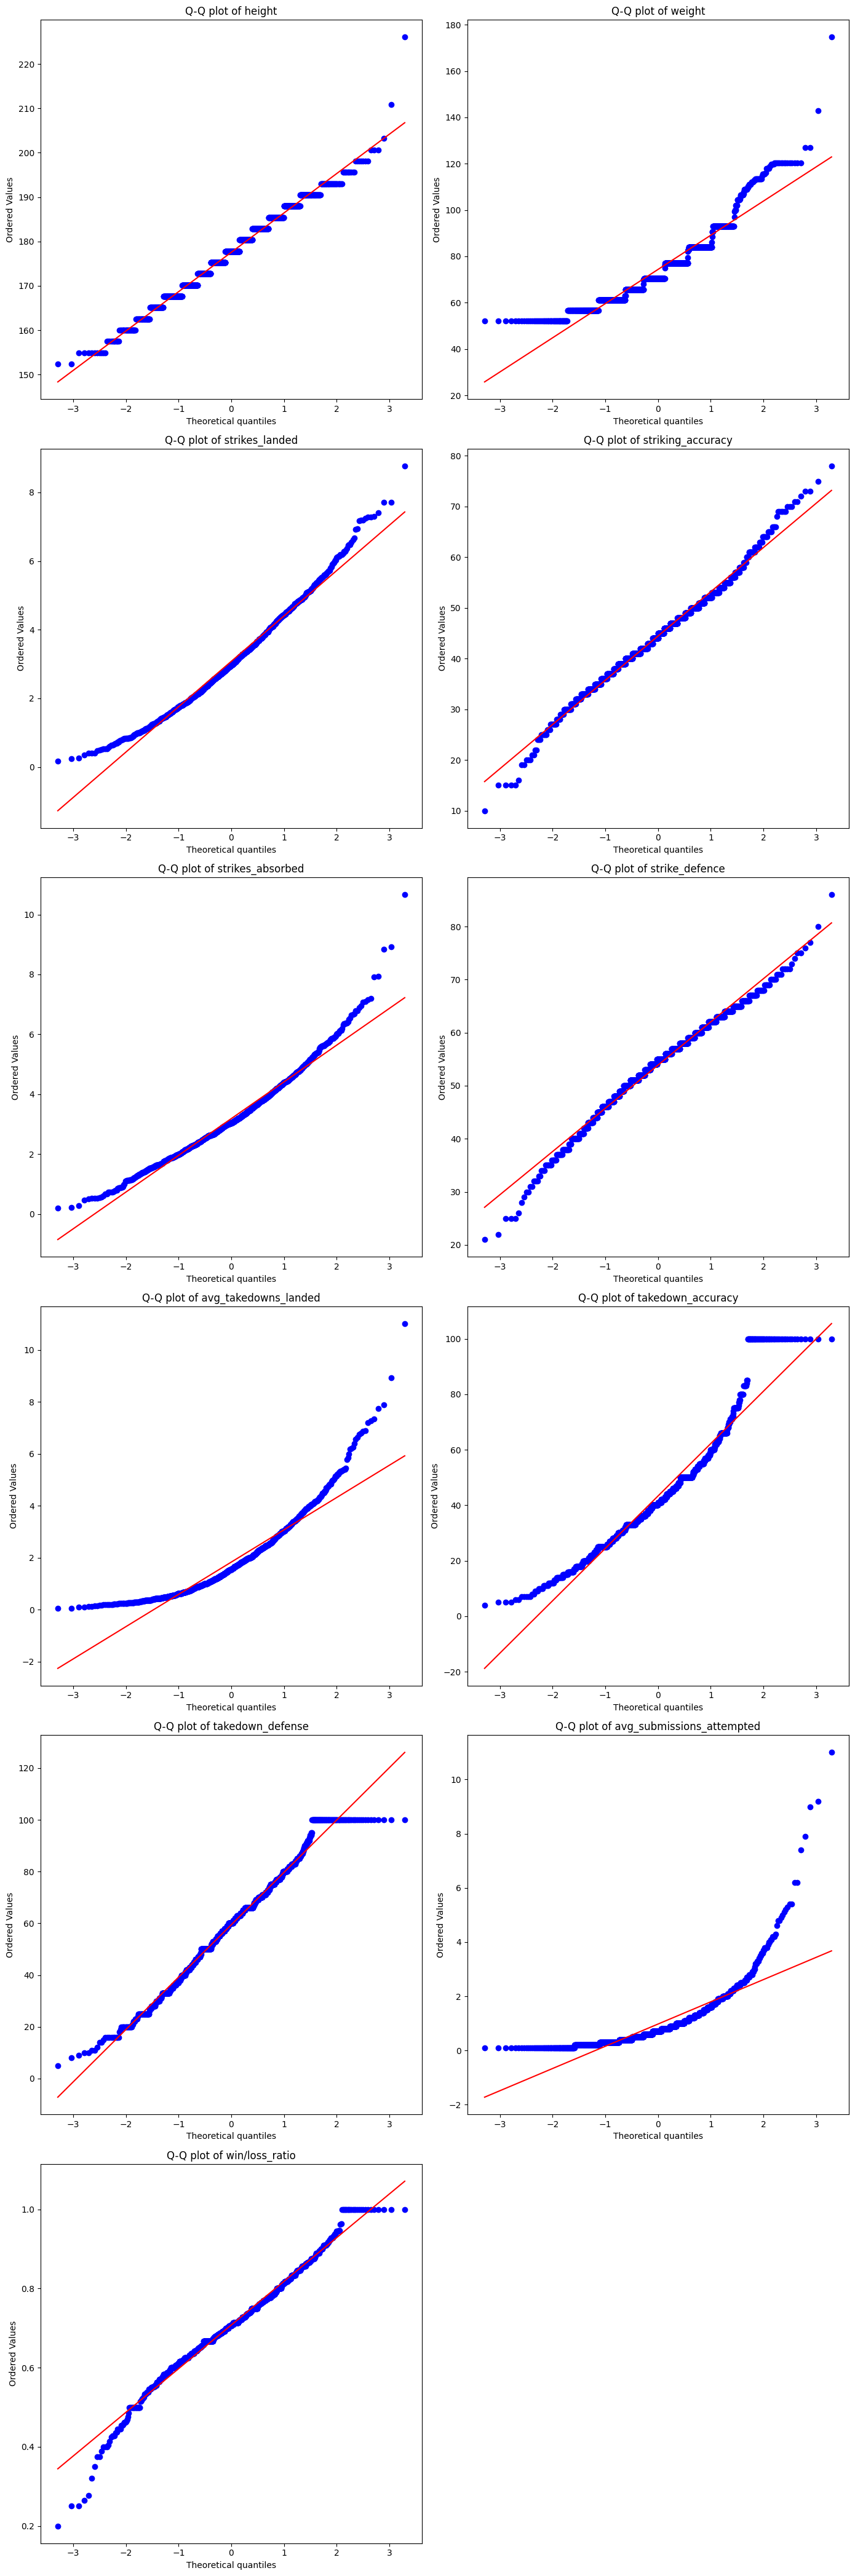

In [95]:
num_features = len(ufc_data.columns)
num_rows = int(np.ceil(num_features / 2))

fig, axs = plt.subplots(num_rows, 2, figsize=(14, 7 * num_rows))
axs = axs.flatten()

for i, col in enumerate(ufc_data.columns):
    stats.probplot(ufc_data[col], dist="norm", plot=axs[i])
    axs[i].set_title(f'Q-Q plot of {col}')

# Hide any remaining subplots if number of features is odd
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

### Understanding feature relationships
First, let's see the distributions for fighters' physical abilities

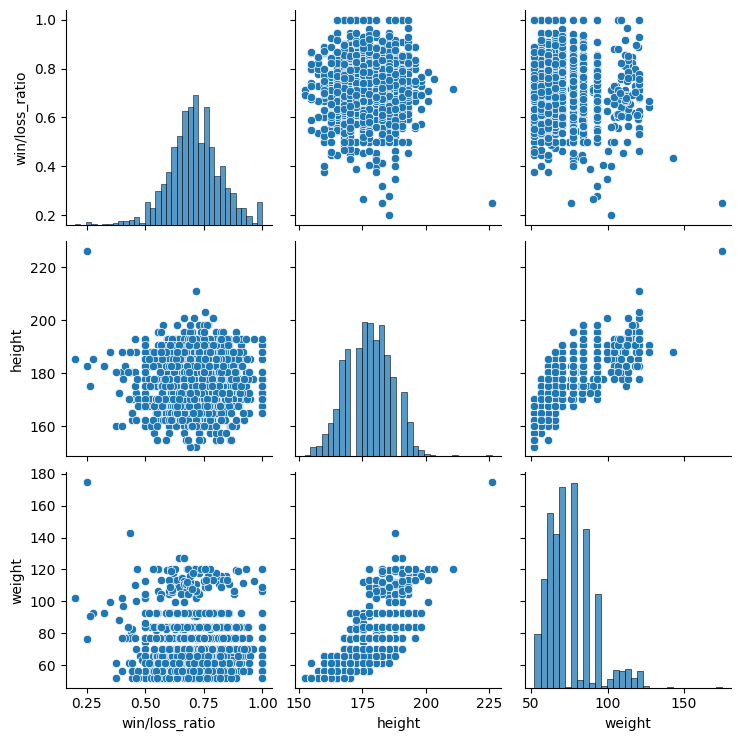

In [96]:
sns.pairplot(ufc_data, vars=['win/loss_ratio', 'height', 'weight',
])
plt.show()

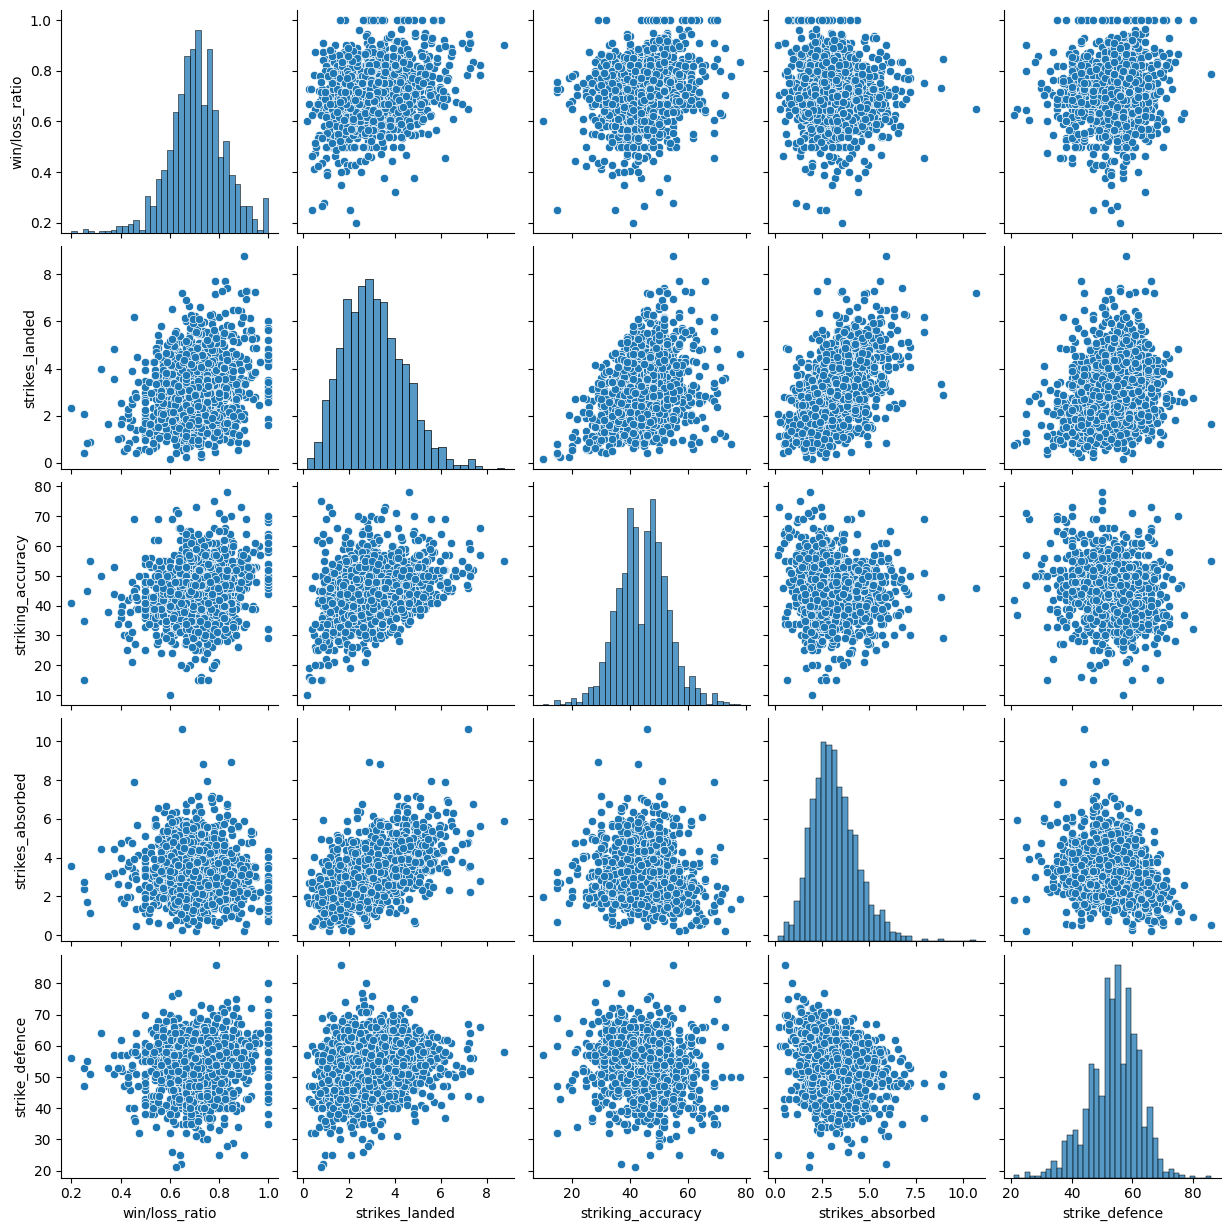

In [97]:
sns.pairplot(ufc_data, vars=['win/loss_ratio','strikes_landed',
                   'striking_accuracy',
                   'strikes_absorbed',
                   'strike_defence',
])
plt.show()

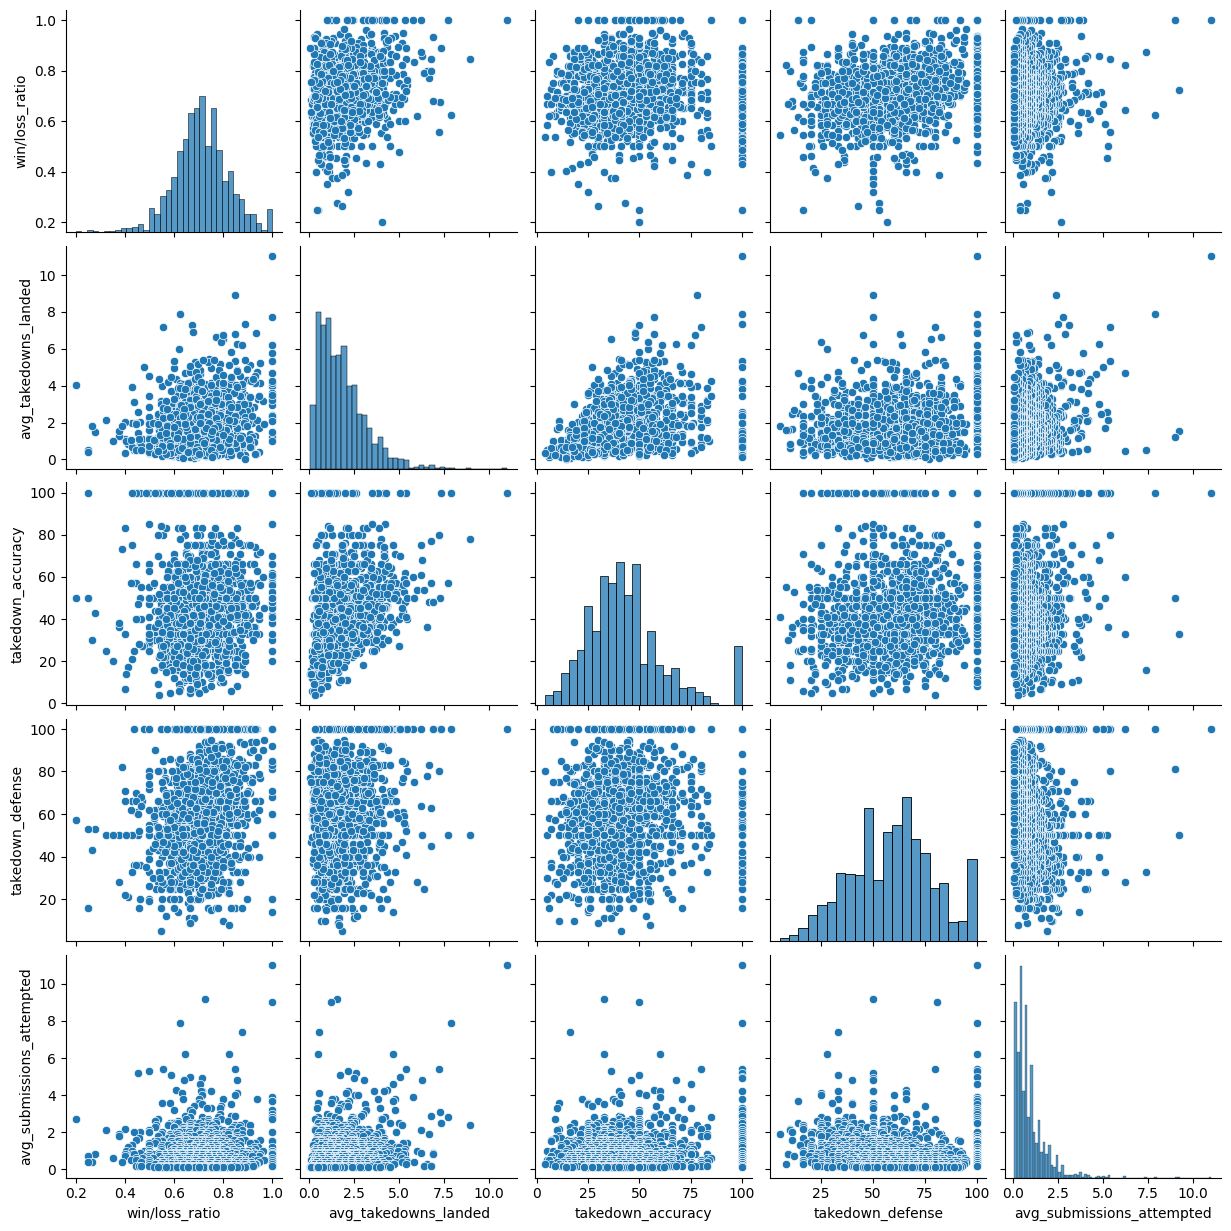

In [98]:
sns.pairplot(ufc_data, vars=['win/loss_ratio','avg_takedowns_landed','takedown_accuracy','takedown_defense',
    'avg_submissions_attempted'])
plt.show()

In [99]:
df_corr = ufc_data[['win/loss_ratio','weight',
                   'height', 'strikes_landed',
                   'striking_accuracy',
                   'strikes_absorbed',
                   'strike_defence',
                   'avg_takedowns_landed','takedown_accuracy','takedown_defense',
    'avg_submissions_attempted']].corr()
df_corr

,win/loss_ratio,weight,height,strikes_landed,striking_accuracy,strikes_absorbed,strike_defence,avg_takedowns_landed,takedown_accuracy,takedown_defense,avg_submissions_attempted
win/loss_ratio,1.000000,-0.094787,-0.012987,0.246228,0.235537,-0.065084,0.086931,0.232413,0.049717,0.233482,0.054712
weight,-0.094787,1.000000,0.786719,-0.127354,0.121191,-0.124646,-0.158815,0.025960,0.110748,0.034527,0.088092
height,-0.012987,0.786719,1.000000,-0.032957,0.123098,-0.092576,-0.160030,-0.049205,0.064353,0.041920,0.100937
strikes_landed,0.246228,-0.127354,-0.032957,1.000000,0.350088,0.511591,0.157879,-0.155867,-0.047014,0.298039,-0.259505
striking_accuracy,0.235537,0.121191,0.123098,0.350088,1.000000,-0.069504,-0.163201,0.158904,0.088790,0.139978,0.037841
strikes_absorbed,-0.065084,-0.124646,-0.092576,0.511591,-0.069504,1.000000,-0.265344,-0.262050,-0.174507,0.076167,-0.182165
strike_defence,0.086931,-0.158815,-0.160030,0.157879,-0.163201,-0.265344,1.000000,-0.020562,0.052678,0.173239,-0.131798
avg_takedowns_landed,0.232413,0.025960,-0.049205,-0.155867,0.158904,-0.262050,-0.020562,1.000000,0.261574,0.167553,0.278101
takedown_accuracy,0.049717,0.110748,0.064353,-0.047014,0.088790,-0.174507,0.052678,0.261574,1.000000,0.091501,0.160873
takedown_defense,0.233482,0.034527,0.041920,0.298039,0.139978,0.076167,0.173239,0.167553,0.091501,1.000000,-0.103727


<Axes: >

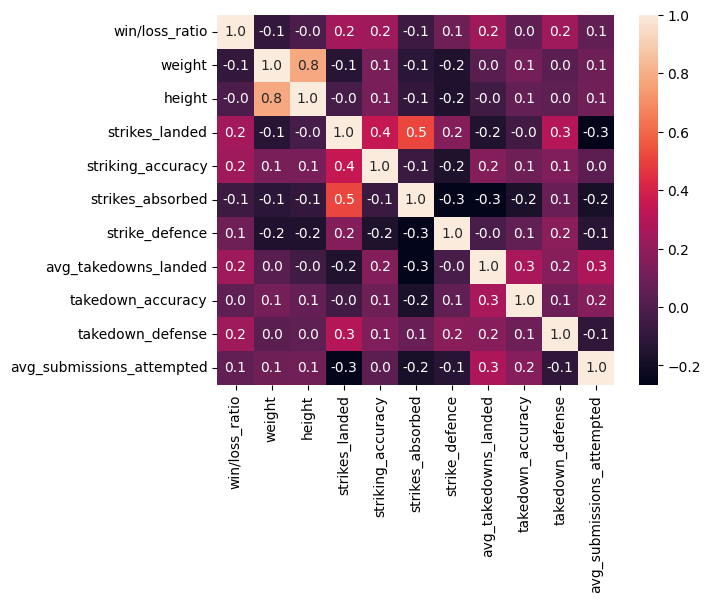

In [100]:
sns.heatmap(df_corr,fmt=".1f", annot=True)

### Train, validation and test split

In [8]:
y = ufc_data["win/loss_ratio"]
x = ufc_data.drop("win/loss_ratio", axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=66)


Data is split into 3 datasets: 10% for test, ~10% on validation, 90% on train

### Training and fine-tuning the model


let's make a function to calculate results

In [42]:
from sklearn.model_selection import KFold

def crossvalidate(model, X, Y, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    mse_list = []
    r2_list = []
    rss_list = []
    mae_list = []
    max_error_list = []
    
    for train_index, val_index in kf.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        Y_train, Y_val = Y.iloc[train_index], Y.iloc[val_index]
    
        model.fit(X_train, Y_train)
    
        Y_pred_val = model.predict(X_val)
    
        mse = mean_squared_error(Y_val, Y_pred_val)
        r2 = r2_score(Y_val, Y_pred_val)
        residuals_val = Y_val - Y_pred_val
        rss = np.mean(np.square(residuals_val))
        mae = np.mean(np.abs(residuals_val))
        max_error = np.max(np.abs(residuals_val))
    
        mse_list.append(mse)
        r2_list.append(r2)
        rss_list.append(rss)
        mae_list.append(mae)
        max_error_list.append(max_error)
    
    
    metrics = {
        'mse': np.mean(mse_list),
        'r2': np.mean(r2_list),
        'rss': np.mean(rss_list),
        'mae': np.mean(mae_list),
        'max_error': np.mean(max_error_list)
    }
    
    return metrics


def crossvalidate_several(models_dict, X_train, Y_train, n_splits=5):
    return {model_name: crossvalidate(model, X_train, Y_train, n_splits) 
                      for model_name, model in models_dict.items()}

        
def print_metrics(models_metrics, metrics2show=('mse', 'r2', 'rss', 'mae', 'max_error')):
    for model_name, metrics_dict in models_metrics.items():
        print(f'{model_name}:\n')
        for metric in metrics2show:
            print(f'{metric} = {metrics_dict[metric]}')
        print('=============================================\n\n')

    

In [26]:
# Define some constants
np.random.seed(989)
N_SPLITS = 8
TO_SHOW = ['mae', 'r2', 'max_error']



## Linear model

In [31]:
# Training without feature selection
# First try
linear_model = LinearRegression()

linear_model_metrics = crossvalidate(linear_model, x_train, y_train, N_SPLITS)
print_metrics({'Linear': linear_model_metrics}, TO_SHOW)

Linear regressor:

mae = 0.07898359286944846
r2 = 0.1704500843640705
max_error = 0.38514341667662716




Results are not impressive, we can make some improvements. 
Transforms like raising input variables to a power can help to better expose the important relationships 
between input variables and the target variable.
Let's try that

### Polynomial features
We generate all polynomial features of degree 2


In [28]:
poly = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

x_train_poly_df = pd.DataFrame(x_train_poly, columns=poly.get_feature_names_out(input_features=x_train.columns))
x_test_poly_df = pd.DataFrame(x_test_poly, columns=poly.get_feature_names_out(input_features=x_test.columns))

x_train_poly_df.columns = x_train_poly_df.columns.str.replace(' ', '_')
x_test_poly_df.columns = x_test_poly_df.columns.str.replace(' ', '_')

# Combine polynomial features with the target variable for training data
train_data_poly = pd.concat([y_train.reset_index(drop=True), x_train_poly_df], axis=1)

train_data_poly


,win/loss_ratio,height,weight,strikes_landed,striking_accuracy,strikes_absorbed,strike_defence,avg_takedowns_landed,takedown_accuracy,takedown_defense,avg_submissions_attempted,height^2,height_weight,height_strikes_landed,height_striking_accuracy,height_strikes_absorbed,height_strike_defence,height_avg_takedowns_landed,height_takedown_accuracy,height_takedown_defense,height_avg_submissions_attempted,weight^2,weight_strikes_landed,weight_striking_accuracy,weight_strikes_absorbed,weight_strike_defence,weight_avg_takedowns_landed,weight_takedown_accuracy,weight_takedown_defense,weight_avg_submissions_attempted,strikes_landed^2,strikes_landed_striking_accuracy,strikes_landed_strikes_absorbed,strikes_landed_strike_defence,strikes_landed_avg_takedowns_landed,strikes_landed_takedown_accuracy,strikes_landed_takedown_defense,strikes_landed_avg_submissions_attempted,striking_accuracy^2,striking_accuracy_strikes_absorbed,striking_accuracy_strike_defence,striking_accuracy_avg_takedowns_landed,striking_accuracy_takedown_accuracy,striking_accuracy_takedown_defense,striking_accuracy_avg_submissions_attempted,strikes_absorbed^2,strikes_absorbed_strike_defence,strikes_absorbed_avg_takedowns_landed,strikes_absorbed_takedown_accuracy,strikes_absorbed_takedown_defense,strikes_absorbed_avg_submissions_attempted,strike_defence^2,strike_defence_avg_takedowns_landed,strike_defence_takedown_accuracy,strike_defence_takedown_defense,strike_defence_avg_submissions_attempted,avg_takedowns_landed^2,avg_takedowns_landed_takedown_accuracy,avg_takedowns_landed_takedown_defense,avg_takedowns_landed_avg_submissions_attempted,takedown_accuracy^2,takedown_accuracy_takedown_defense,takedown_accuracy_avg_submissions_attempted,takedown_defense^2,takedown_defense_avg_submissions_attempted,avg_submissions_attempted^2
0,0.631579,165.10,61.23,2.48,40.0,3.87,57.0,1.74,41.0,31.0,0.7,27258.0100,10109.0730,409.4480,6604.00,638.9370,9410.70,287.2740,6769.10,5118.10,115.570,3749.1129,151.8504,2449.20,236.9601,3490.11,106.5402,2510.43,1898.13,42.861,6.1504,99.20,9.5976,141.36,4.3152,101.68,76.88,1.736,1600.0,154.80,2280.0,69.60,1640.0,1240.0,28.0,14.9769,220.59,6.7338,158.67,119.97,2.709,3249.0,99.18,2337.0,1767.0,39.9,3.0276,71.34,53.94,1.218,1681.0,1271.0,28.7,961.0,21.7,0.49
1,0.684211,182.88,70.31,3.76,42.0,3.07,60.0,0.92,28.0,71.0,0.5,33445.0944,12858.2928,687.6288,7680.96,561.4416,10972.80,168.2496,5120.64,12984.48,91.440,4943.4961,264.3656,2953.02,215.8517,4218.60,64.6852,1968.68,4992.01,35.155,14.1376,157.92,11.5432,225.60,3.4592,105.28,266.96,1.880,1764.0,128.94,2520.0,38.64,1176.0,2982.0,21.0,9.4249,184.20,2.8244,85.96,217.97,1.535,3600.0,55.20,1680.0,4260.0,30.0,0.8464,25.76,65.32,0.460,784.0,1988.0,14.0,5041.0,35.5,0.25
2,0.595745,175.26,65.77,3.17,40.0,3.05,58.0,1.16,38.0,65.0,0.4,30716.0676,11526.8502,555.5742,7010.40,534.5430,10165.08,203.3016,6659.88,11391.90,70.104,4325.6929,208.4909,2630.80,200.5985,3814.66,76.2932,2499.26,4275.05,26.308,10.0489,126.80,9.6685,183.86,3.6772,120.46,206.05,1.268,1600.0,122.00,2320.0,46.40,1520.0,2600.0,16.0,9.3025,176.90,3.5380,115.90,198.25,1.220,3364.0,67.28,2204.0,3770.0,23.2,1.3456,44.08,75.40,0.464,1444.0,2470.0,15.2,4225.0,26.0,0.16
3,0.772727,185.42,83.91,2.17,53.0,2.43,45.0,3.13,40.0,100.0,0.5,34380.5764,15558.5922,402.3614,9827.26,450.5706,8343.90,580.3646,7416.80,18542.00,92.710,7040.8881,182.0847,4447.23,203.9013,3775.95,262.6383,3356.40,8391.00,41.955,4.7089,115.01,5.2731,97.65,6.7921,86.80,217.00,1.085,2809.0,128.79,2385.0,165.89,2120.0,5300.0,26.5,5.9049,109.35,7.6059,97.20,243.00,1.215,2025.0,140.85,1800.0,4500.0,22.5,9.7969,125.20,313.00,1.565,1600.0,4000.0,20.0,10000.0,50.0,0.25
4,0.866667,175.26,61.23,5.32,51.0,4.20,53.0,2.72,50.0,56.0,1.3,30716.0676,10731.1698,932.3832,8938.26,736.0920,9288.78,476.7072,8763.00,9814.56,227.838,3749.1129,325.7436,3122.73,257.1660,3245.19,166.5456,3061.50,3428.88,79.599,28.3024,271.32,22.3440,281.96,14.4704,266.00,297.92,6.916,2601.0,214.20,2703.0,138.72,2550.0,2856.0,66.3,17.640

### Feature selection with forward and backward pass

In [50]:

def fb_pass(model, X_train, Y_train, forward_features='auto', backward_features='auto'):
    forward_selector = SequentialFeatureSelector(model, n_features_to_select=forward_features, direction='forward', cv=5)
    forward_selector.fit(X_train, Y_train)
    
    # Get the column names of the selected features
    forward_selected_columns = X_train.columns[forward_selector.get_support()]
    x_train_forward_selected = forward_selector.transform(X_train)
    x_train_forward_selected_df = pd.DataFrame(x_train_forward_selected, columns=forward_selected_columns)
    
    backward_selector = SequentialFeatureSelector(model, n_features_to_select=backward_features, direction='backward', cv=5)
    backward_selector.fit(x_train_forward_selected_df, Y_train)
    
    # Get the column names of the final selected features
    backward_selected_columns = forward_selected_columns[backward_selector.get_support()]
    x_train_selected = backward_selector.transform(x_train_forward_selected_df)
    x_train_selected_df = pd.DataFrame(x_train_selected, columns=backward_selected_columns)
    
    return x_train_selected_df


In [61]:

x_lm_selected = fb_pass(linear_model, x_train_poly_df, y_train)
lm_selected_features = x_lm_selected.columns
lm_selected_metrics = crossvalidate(linear_model, x_lm_selected, y_train, N_SPLITS)
    
print(f'{len(lm_selected_features)} out of {len(x_train_poly_df.columns)} features selected for linear model:\n'
      f'{lm_selected_features}\n')

print_metrics({'Linear': lm_selected_metrics}, TO_SHOW)


16 out of 65 features selected for linear model:
Index(['height', 'strike_defence', 'weight^2', 'weight_strikes_absorbed',
       'strikes_landed_strike_defence', 'striking_accuracy^2',
       'striking_accuracy_strike_defence', 'strikes_absorbed_strike_defence',
       'strikes_absorbed_takedown_defense',
       'strikes_absorbed_avg_submissions_attempted',
       'strike_defence_avg_takedowns_landed',
       'strike_defence_takedown_accuracy',
       'avg_takedowns_landed_takedown_defense',
       'avg_takedowns_landed_avg_submissions_attempted', 'takedown_accuracy^2',
       'takedown_defense^2'],
      dtype='object')

Linear:

mae = 0.07744714817011689
r2 = 0.20637777009738034
max_error = 0.36822783826665306




#### As we can see, adding quadratic features and performing feature selection slightly improved the results.

In [35]:
# Placeholder for Nikita
# Here goes the gridsearch I assume

## Trying other models: kNN and Random forest

In [37]:
models = {
    'kNN': KNeighborsRegressor(n_neighbors=3),
    'Random forest': RandomForestRegressor(n_estimators=100)
}

metrics = crossvalidate_several(models, x_train, y_train, N_SPLITS)

print_metrics(metrics, TO_SHOW)

kNN regressor:

mae = 0.09258993168752912
r2 = -0.11019703663584039
max_error = 0.3856707716044017


Random forest regressor:

mae = 0.08010494302669482
r2 = 0.13990592256811027
max_error = 0.37913239665802523




#### As it turns out, these models lose to the linear one in accuracy. However, we have an oportunity to tune the parameters, so let's do it!

## Parameters selection

In [38]:
def select_best_model(models_dict, X_train, Y_train, n_splits=5, target_metric='mae'):
    models_metrics = crossvalidate_several(models_dict, X_train, Y_train, n_splits)
    
    best_model_name = sorted(models_metrics.items(), key=lambda tpl: tpl[1][target_metric])[0][0]
    
    return best_model_name, models_dict[best_model_name]

### kNN

In [12]:
TARGET_METRIC = 'mae'

In [41]:

# Let's try different numbers of neighbors
neighbors_range = range(3, 10)

knn_models = {n: KNeighborsRegressor(n_neighbors=n) for n in neighbors_range}

best_param, best_knn_model = select_best_model(knn_models, x_train, y_train, N_SPLITS, TARGET_METRIC)

best_knn_metrics = crossvalidate(best_knn_model, x_train, y_train, N_SPLITS)

print_metrics({f'kNN with {best_param} neighbors': best_knn_metrics}, TO_SHOW)

# Switch the previous kNN model with a better one
models['kNN'] = best_knn_model


kNN with 9 neighbors regressor:

mae = 0.08491354292477782
r2 = 0.03510618157030765
max_error = 0.38551325258642744




### Random Forest

In [43]:

# Define the parameters to choose from
estimators = [10, 20, 50, 100, 150, 200]
depths = [None, 5, 10, 20]

rf_models = {
    (n, depth): RandomForestRegressor(n_estimators=n, max_depth=depth)
    for n in estimators for depth in depths
}

best_params, best_forest = select_best_model(rf_models, x_train, y_train, N_SPLITS, TARGET_METRIC)
n, depth = best_params

best_rf_metrics = crossvalidate(best_forest, x_train, y_train, N_SPLITS)

print_metrics(
    {f'Random Forest with {n} estimators and max depth of {depth}': best_rf_metrics},
    TO_SHOW
)

models['Random forest'] = best_forest

Random Forest with 20 estimators and max depth of 5:

mae = 0.08000462122950532
r2 = 0.13510188192525197
max_error = 0.39112019780194796




#### Now, let's have a look on all 3 of our models

In [44]:
models['Linear'] = linear_model

# Note: linear model without feature selection
models_metrics = crossvalidate_several(models, x_train, y_train, N_SPLITS)

print_metrics(models_metrics, TO_SHOW)

kNN:

mae = 0.08491354292477782
r2 = 0.03510618157030765
max_error = 0.38551325258642744


Random forest:

mae = 0.07978850045568803
r2 = 0.14213206511313214
max_error = 0.3853172597888314


Linear:

mae = 0.07898359286944846
r2 = 0.1704500843640705
max_error = 0.38514341667662716




In [47]:
# Comparing previous results with the linear model on selected features
print_metrics({'Linear model with selected features': lm_selected_metrics}, TO_SHOW)

Linear model with selected features:

mae = 0.07744714817011689
r2 = 0.20637777009738034
max_error = 0.36822783826665306




#### This is still our best option so far, but can we do feature selection for the other two models as well?

### Feature selection for kNN

In [46]:
x_knn_selected = fb_pass(models['kNN'], x_train_poly_df, y_train)
knn_selected_features = x_knn_selected.columns
knn_selected_metrics = crossvalidate(models['kNN'], x_knn_selected, y_train, N_SPLITS)
    
print(f'{len(knn_selected_features)} out of {len(x_train_poly_df.columns)} features selected for kNN model:\n'
      f'{knn_selected_features}\n')

print_metrics({'kNN': knn_selected_metrics}, TO_SHOW)

16 out of 65 features selected for kNN model:
Index(['weight', 'striking_accuracy', 'strike_defence', 'takedown_accuracy',
       'height_strikes_absorbed', 'weight_avg_takedowns_landed',
       'weight_avg_submissions_attempted', 'strikes_landed_striking_accuracy',
       'strikes_landed_takedown_accuracy', 'strikes_landed_takedown_defense',
       'striking_accuracy_avg_takedowns_landed', 'strikes_absorbed^2',
       'strike_defence_avg_takedowns_landed',
       'avg_takedowns_landed_takedown_defense',
       'avg_takedowns_landed_avg_submissions_attempted',
       'takedown_defense_avg_submissions_attempted'],
      dtype='object')

kNN:

mae = 0.08112206514513695
r2 = 0.10651591260202417
max_error = 0.3772643435678278




### Feature selection for Random forest

In [51]:
x_rf_selected = fb_pass(models['Random forest'], x_train_poly_df, y_train, 
                        forward_features=15, backward_features=10)
rf_selected_features = x_rf_selected.columns
rf_selected_metrics = crossvalidate(models['Random forest'], x_rf_selected, y_train, N_SPLITS)
    
print(f'{len(rf_selected_features)} out of {len(x_train_poly_df.columns)} features selected for Random forest model:\n'
      f'{rf_selected_features}\n')

print_metrics({'Random forest': knn_selected_metrics}, TO_SHOW)

10 out of 65 features selected for Random forest model:
Index(['weight', 'strikes_absorbed', 'height^2', 'height_takedown_defense',
       'weight_strikes_landed', 'strikes_landed_striking_accuracy',
       'strikes_landed_takedown_defense',
       'striking_accuracy_avg_takedowns_landed',
       'striking_accuracy_avg_submissions_attempted',
       'strikes_absorbed_takedown_defense'],
      dtype='object')

Random forest:

mae = 0.08112206514513695
r2 = 0.10651591260202417
max_error = 0.3772643435678278




#### Finally, let's determine the accuracy of our models on the test set!

In [69]:
def performance(model, x_train, y_train, x_test, y_test):
    y_pred_train = model.predict(x_train)
    y_pred_val = model.predict(x_test)
    residuals_train = y_train - y_pred_train
    rss_train = np.sqrt(np.mean(np.square(residuals_train)))
    residuals_val = y_test - y_pred_val
    rss_val = np.sqrt(np.mean(np.square(residuals_val)))
    
    print(
        # f"Train set:\n"
        # f"r2 = {r2_score(y_train, y_pred_train)}\n"
        # f"rss = {rss_train:.3f}\n"
        # f"mae = {np.mean(np.abs(residuals_train)):.3f}\n"
        # f"max_error = {np.max(residuals_train):.3f}\n \n"
        f"Test set:\n"
        f"r2 = {r2_score(y_test, y_pred_val)}\n"
        f"rss = {rss_val:.3f}\n"
        f"mae = {np.mean(np.abs(residuals_val)):.3f}\n"
        f"max_error = {np.max(residuals_val):.3f}"
    )

In [70]:

selected_features = {
    'Linear': lm_selected_features,
    'kNN': knn_selected_features,
    'Random forest': rf_selected_features
}

for model_name in models:
    features = selected_features[model_name]
    model = models[model_name]
    
    model.fit(x_train_poly_df[features], y_train)
    print(f'{model_name} model fitted\n')
    performance(
        model, 
        x_train_poly_df[features],
        y_train,
        x_test_poly_df[features],
        y_test
    )
    print('=============================\n\n')

kNN model fitted

Test set:
r2 = 0.00798917108728081
rss = 0.099
mae = 0.078
max_error = 0.237


Random forest model fitted

Test set:
r2 = 0.12644091166450122
rss = 0.093
mae = 0.071
max_error = 0.180


Linear model fitted

Test set:
r2 = 0.05083786022388703
rss = 0.096
mae = 0.071
max_error = 0.196




### mRMR feature selection

In [ ]:
# Apply mRMR for feature selection
selected_features = pymrmr.mRMR(train_data_poly, 'MIQ', 5)

# Drop the target variable from selected features
print(selected_features)

Now let's see the results of regression using polynomial features and feature selection via mRMR


In [ ]:
x_train_mrmr = x_train_poly_df[selected_features]
x_val_mrmr = x_val_poly_df[selected_features]

model.fit(x_train_mrmr, y_train)

y_pred_train = model.predict(x_train_mrmr)
y_pred_val = model.predict(x_val_mrmr)
residuals_train = y_train - y_pred_train
rss_train = np.sum(np.square(residuals_train))
residuals_val = y_val - y_pred_val
rss_val = np.sum(np.square(residuals_val))

print(f"With mRMR feature selection\n\n"
      f"Train set:\n"
      f"R2:{r2_score(y_train, y_pred_train)}\n"
      f"RSS: {rss_train:.3f}\nMEAN ABSOLUTE ERROR:{np.mean(np.abs(residuals_train)):.3f}\n"
      f"MAX Error:{np.max(residuals_train):.3f}\n \n"
      f"Validation set:\n"
      f"R2:{r2_score(y_val, y_pred_val)}\n"
      f"RSS: {rss_val:.3f}\nMEAN ABSOLUTE ERROR:{np.mean(np.abs(residuals_val)):.3f}\n"
      f"MAX Error:{np.max(residuals_val):.3f}")

In [20]:
# print(len(set(selected_features['Linear']) | set(selected_features['Knn'])))
fb_pass(KNeighborsRegressor(n_neighbors=5), x_train_poly_df, y_train)

,strike_defence,takedown_accuracy,height_striking_accuracy,height_avg_takedowns_landed,weight^2,weight_striking_accuracy,strikes_landed^2,strikes_landed_strikes_absorbed,strikes_landed_takedown_accuracy,striking_accuracy^2,striking_accuracy_strike_defence,striking_accuracy_takedown_defense,strike_defence_avg_takedowns_landed,strike_defence_avg_submissions_attempted,avg_takedowns_landed_takedown_accuracy,avg_takedowns_landed_takedown_defense
0,57.0,41.0,6604.00,287.2740,3749.1129,2449.20,6.1504,9.5976,101.68,1600.0,2280.0,1240.0,99.18,39.9,71.34,53.94
1,60.0,28.0,7680.96,168.2496,4943.4961,2953.02,14.1376,11.5432,105.28,1764.0,2520.0,2982.0,55.20,30.0,25.76,65.32
2,58.0,38.0,7010.40,203.3016,4325.6929,2630.80,10.0489,9.6685,120.46,1600.0,2320.0,2600.0,67.28,23.2,44.08,75.40
3,45.0,40.0,9827.26,580.3646,7040.8881,4447.23,4.7089,5.2731,86.80,2809.0,2385.0,5300.0,140.85,22.5,125.20,313.00
4,53.0,50.0,8938.26,476.7072,3749.1129,3122.73,28.3024,22.3440,266.00,2601.0,2703.0,2856.0,144.16,68.9,136.00,152.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244,63.0,50.0,7574.28,348.0562,5945.9521,3238.62,10.6276,9.0302,163.00,1764.0,2646.0,2772.0,121.59,18.9,96.50,127.38
1245,47.0,41.0,11742.42,410.1338,3214.8900,3912.30,10.4329,4.0698,132.43,4761.0,3243.0,4140.0,113.27,131.6,98.81,144.60
1246,57.0,34.0,9144.00,265.1760,7040.8881,4195.50,8.5849,8.4970,99.62,2500.0,2850.0,2950.0,82.65,45.6,49.30,85.55
1247,60.0,35.0,8117.84,347.1672,5945.9521,3624.17,12.3904,11.2288,123.20,2209.0,2820.0,2632.0,120.60,36.0,70.35,112.56


## Grid search hyperparameter optimization

In [21]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.feature_selection import f_regression
import statsmodels.api as sm

class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, method='mRMR', k=10):
        self.method = method
        self.k = k

    def fit(self, X, y=None):
        if self.method == 'mRMR':
            self.selector = SelectKBest(score_func=f_regression, k=self.k)
            self.selector.fit(X, y)
        return self

    def transform(self, X, y=None):
        if self.method == 'backward':
            return self.backward_elimination(X, y)
        elif self.method == 'mRMR':
            return self.selector.transform(X)
        else:
            raise ValueError("Method not recognized")

    def backward_elimination(self, X, y):
        X = np.append(arr = np.ones((X.shape[0], 1)).astype(int), values = X, axis = 1)
        X_opt = X[:, list(range(X.shape[1]))]
        regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
        p_values = regressor_OLS.pvalues
        while max(p_values) > 0.05:
            max_p_idx = np.argmax(p_values)
            X_opt = np.delete(X_opt, max_p_idx, 1)
            regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
            p_values = regressor_OLS.pvalues
        return X_opt[:, 1:]  # Exclude the intercept term

# Define a scorer
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Create a pipeline
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('selector', FeatureSelector()),  # Custom selector
    ('model', LinearRegression())
])

# Define parameter grid
param_grid = {
    'poly__degree': [2, 3],  # Example degrees for polynomial features
    'selector__method': ['mRMR', 'backward'],  # Select feature selection method
    'selector__k': [10, 20, 30]  # Number of features for mRMR (backward pass will ignore this)
}

# Create grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=scorer)

# Fit grid search
grid_search.fit(x, y)

# Get the best parameters and estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)


Best Parameters: {'poly__degree': 2, 'selector__k': 30, 'selector__method': 'mRMR'}


D:\Apps\Python\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Apps\Python\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Apps\Python\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Apps\Python\Lib\site-packages\sklearn\pipeline.py", line 469, in fit
    Xt = self._fit(X, y, routed_params)
         ^^^^^^^^^^^^^^^^^^^^